In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [98]:
train_df = pd.read_csv("KDDTrain+.txt")
train_df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [99]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

train_df.columns = columns

In [40]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [41]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


In [42]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [43]:
#helper function for deeper analysis
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

<Figure size 2000x4000 with 0 Axes>

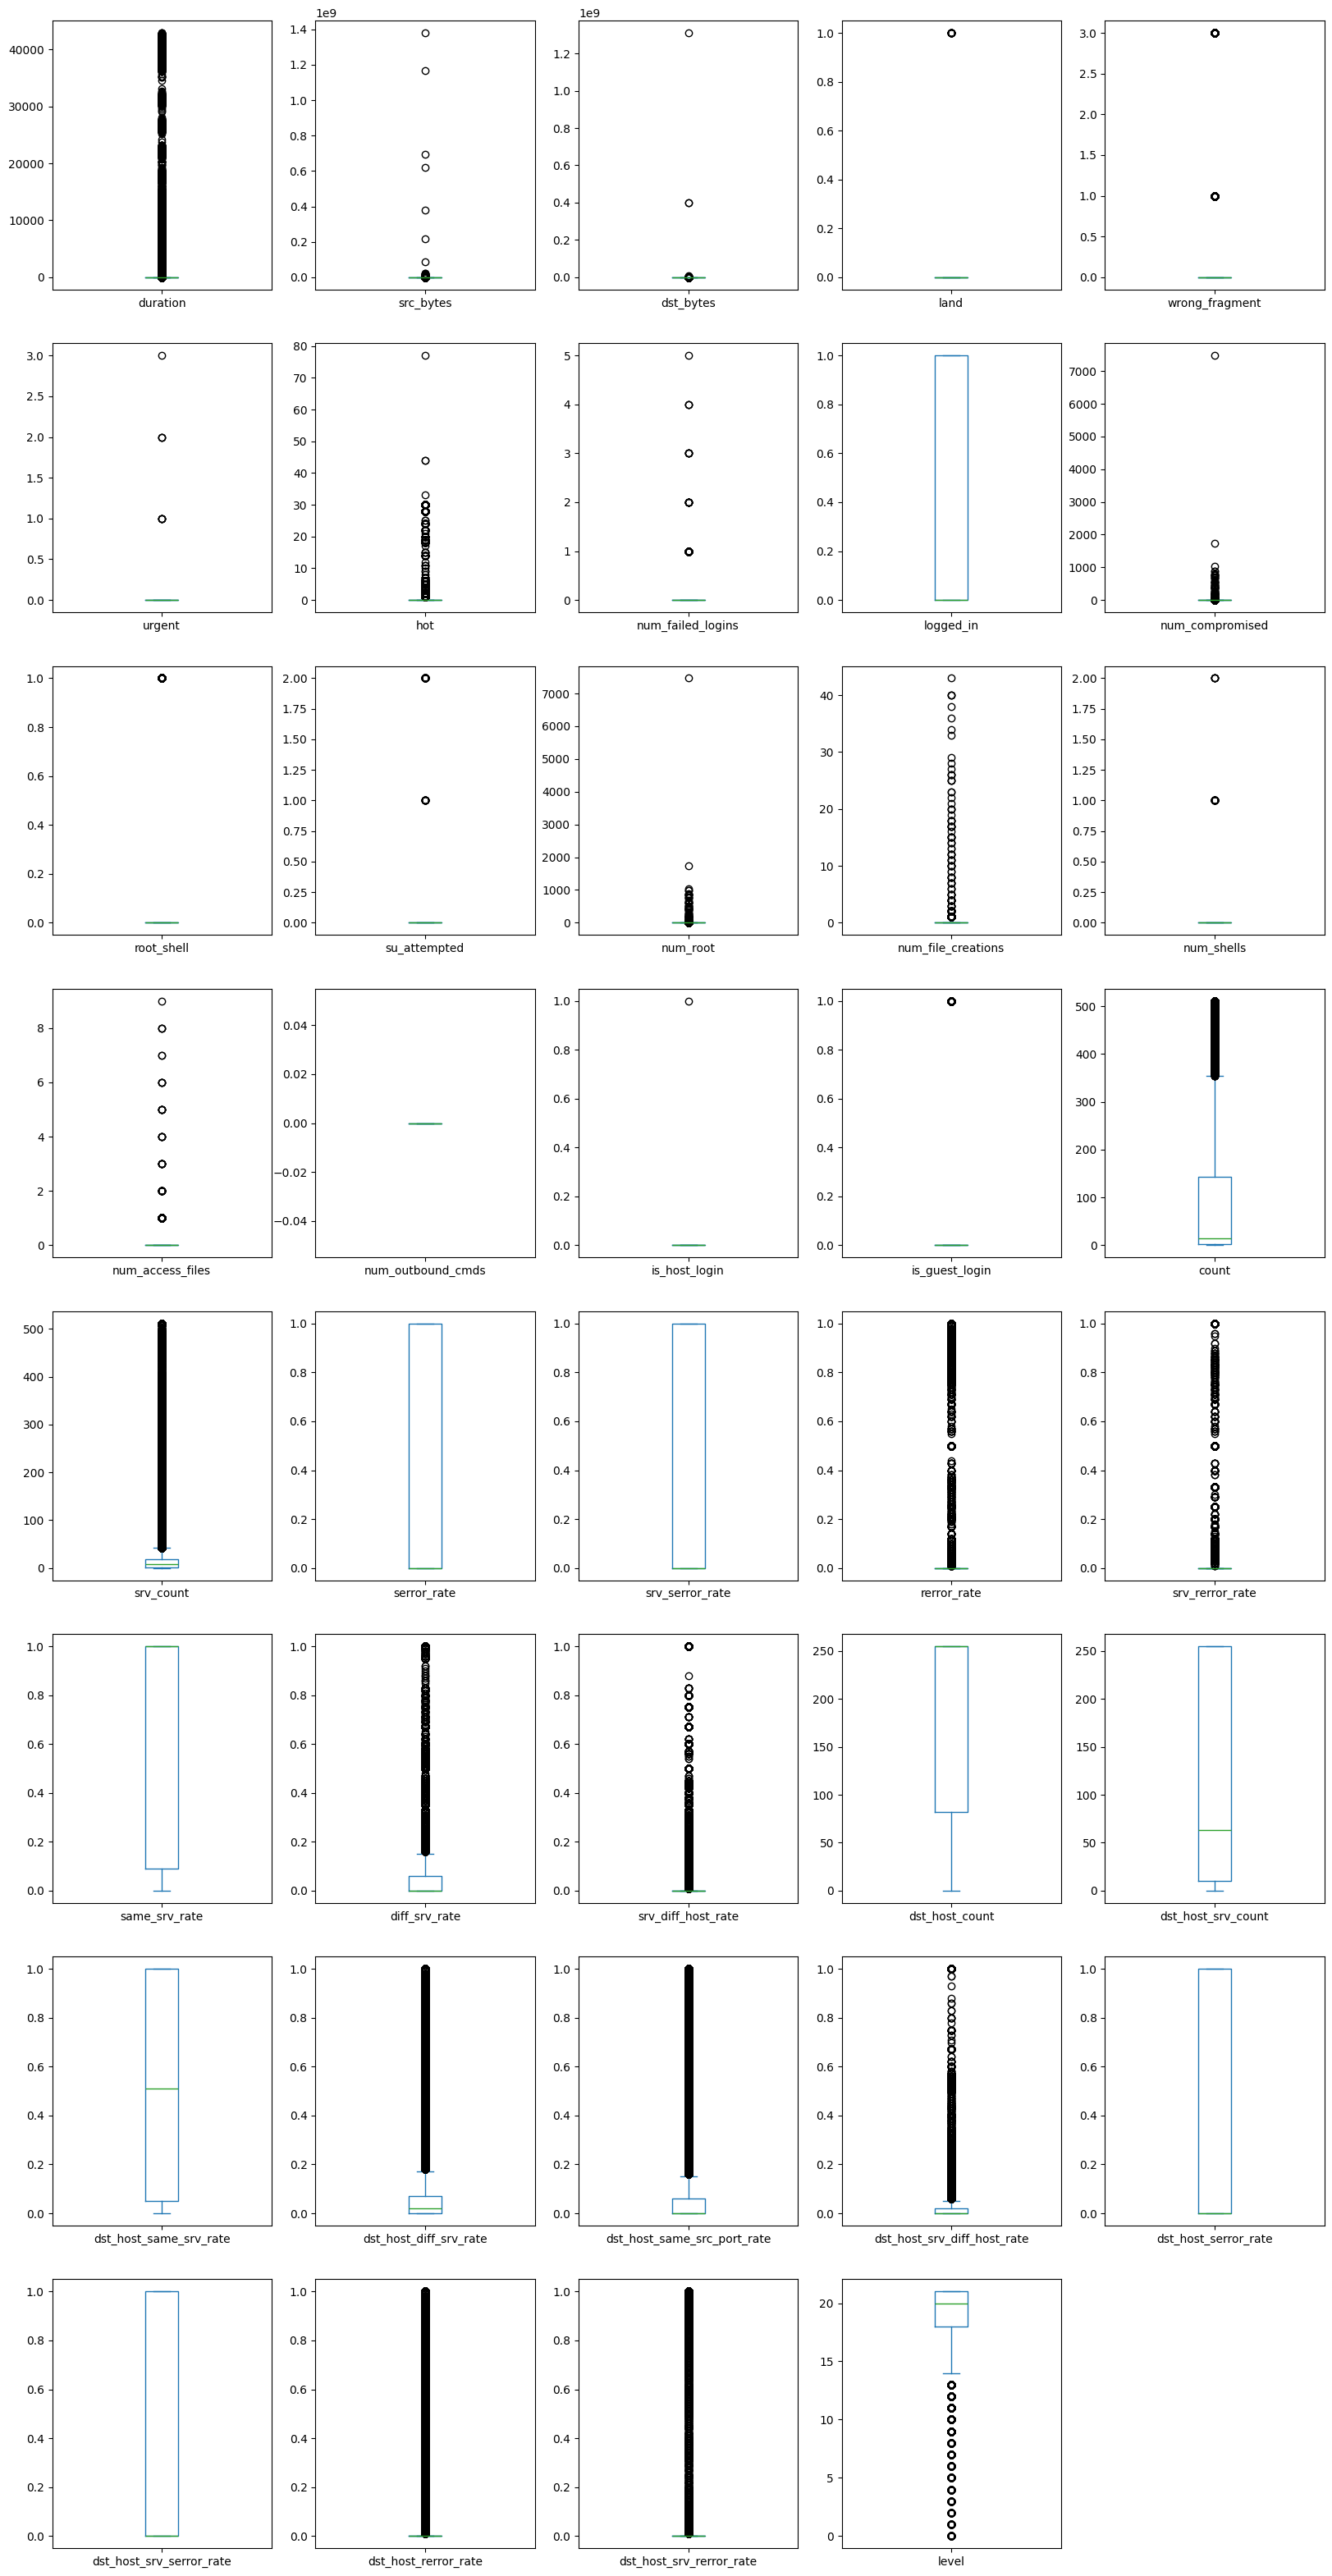

In [44]:
plt.figure(figsize=(20, 40))
train_df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [45]:
attack_n = []
for i in train_df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
train_df['attack_flag'] = attack_n 

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>],
       [<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>,
        <Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>],
       [<Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>,
        <Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'center': 'is_host_login'}>],
       [<Axes: title={'center': 'is_guest_login'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title

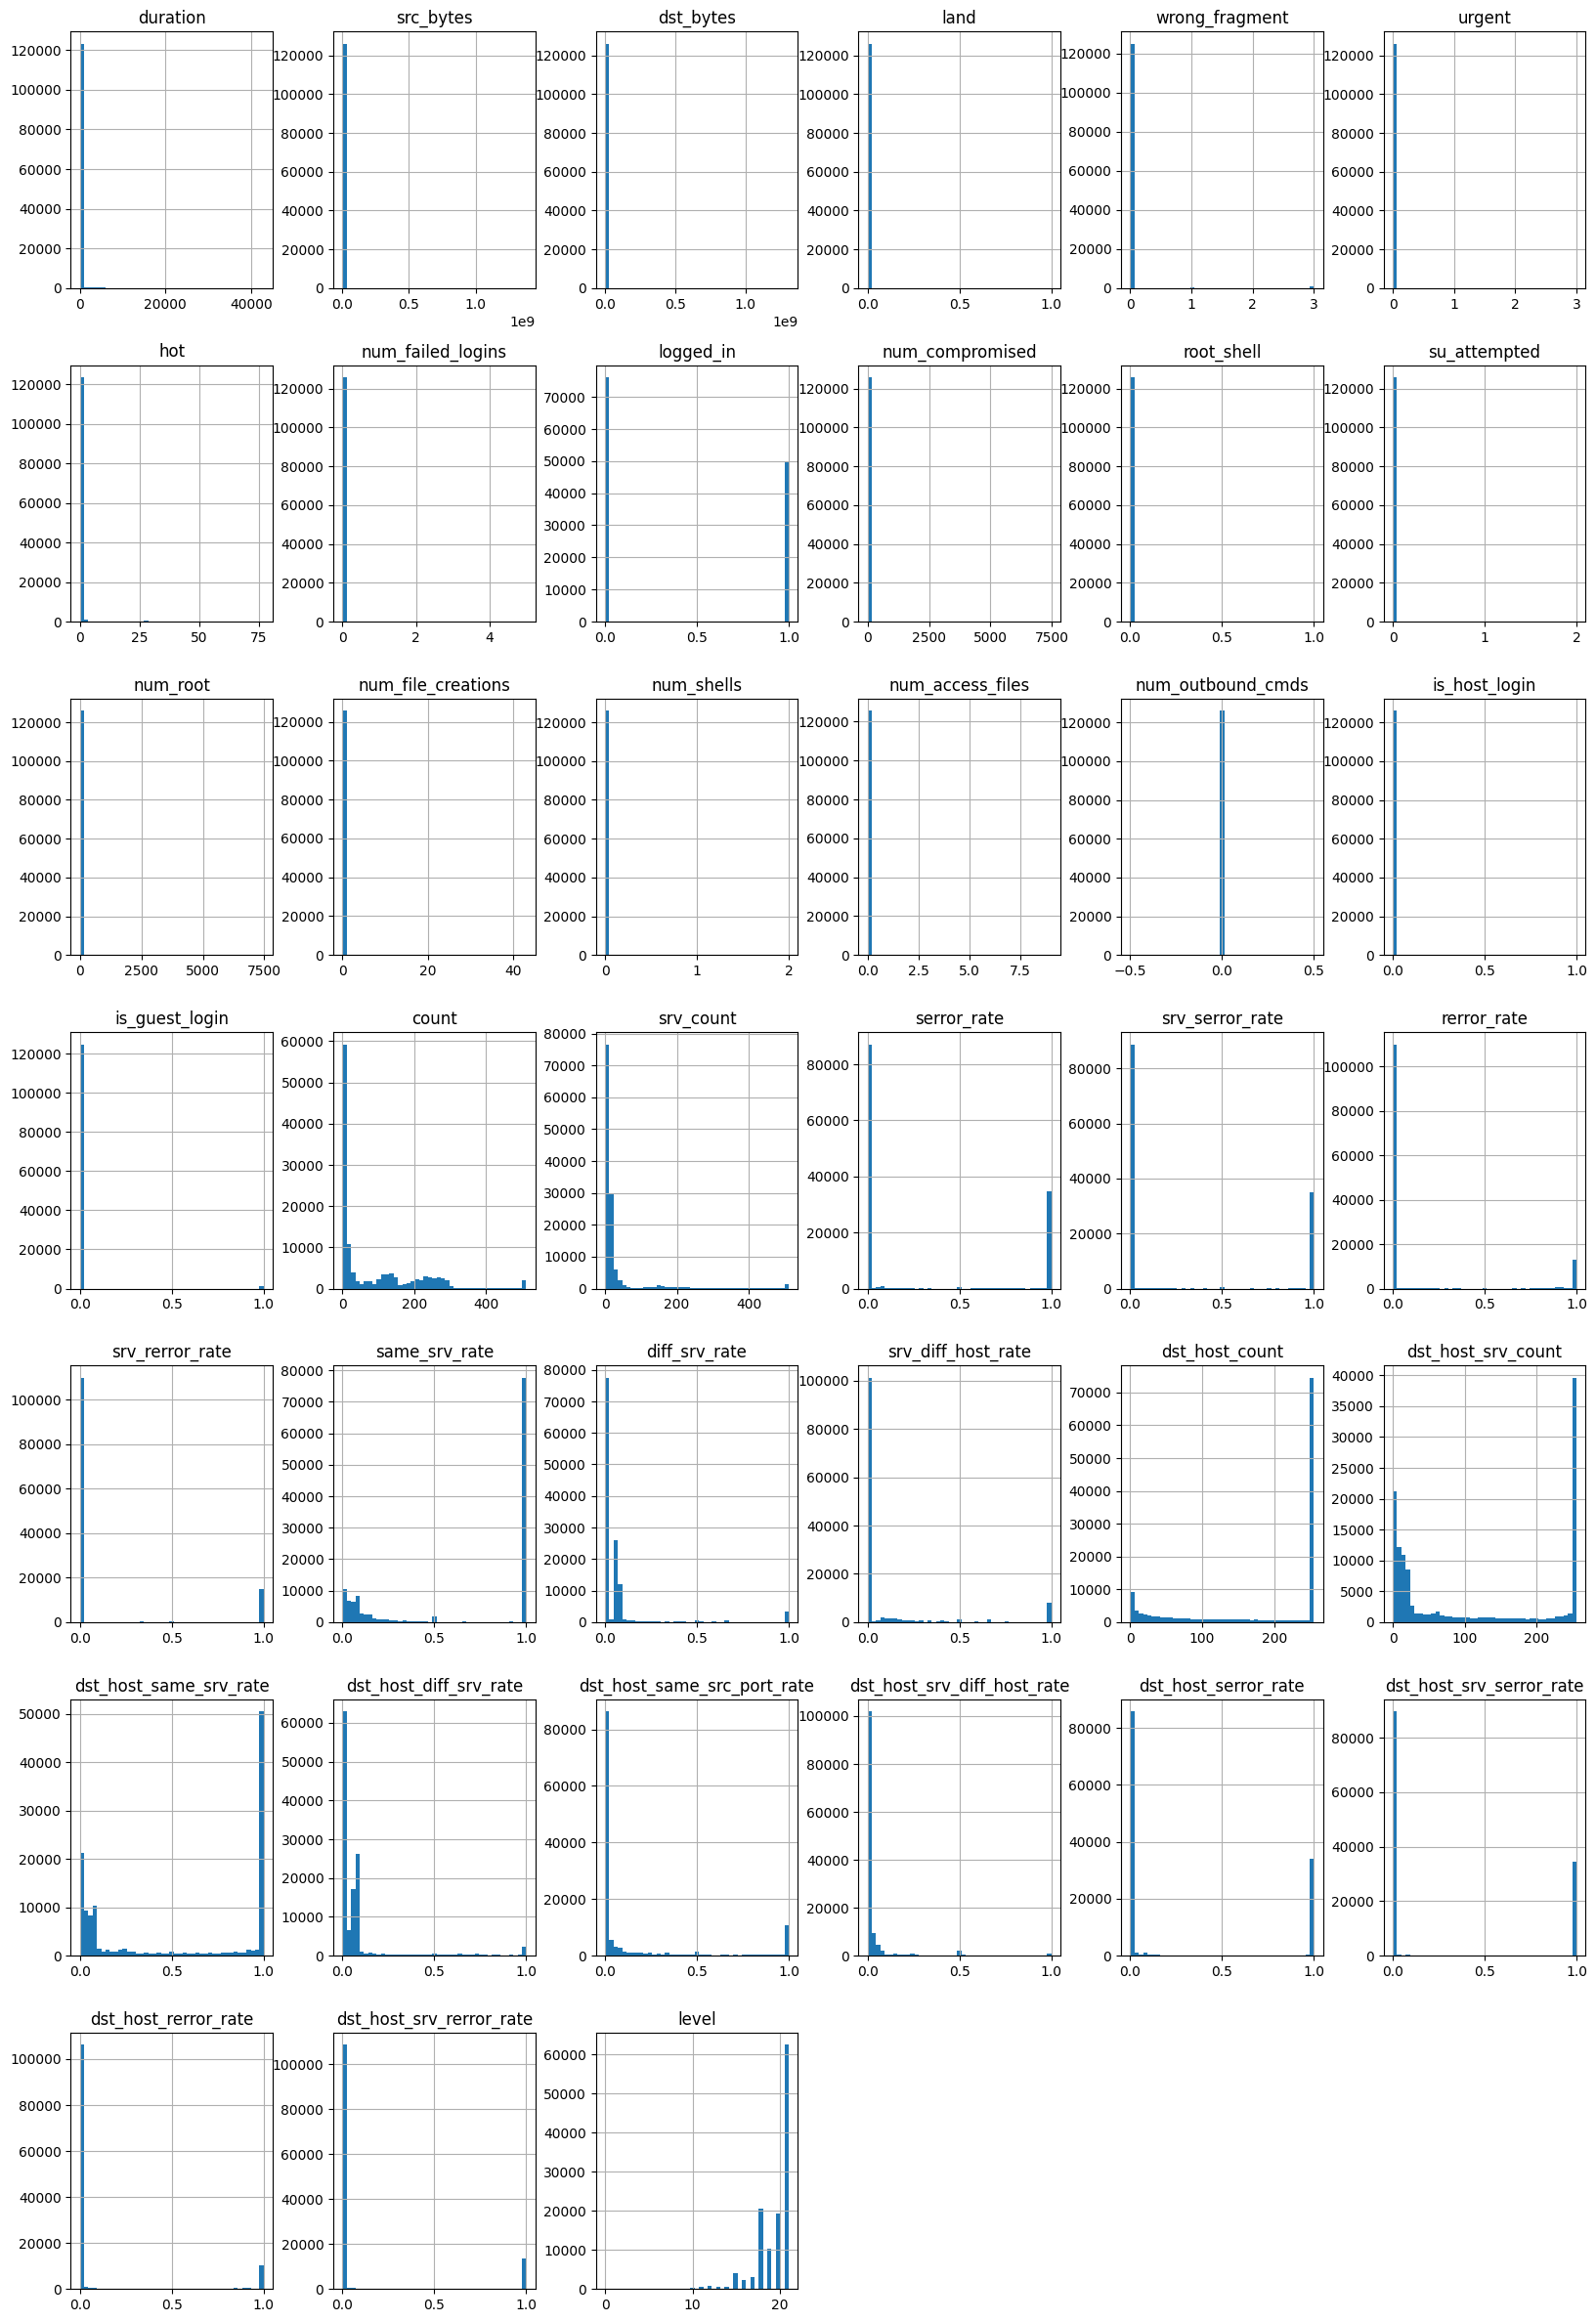

# 前処理

## Target Encoding

In [65]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
target_column_list=['protocol_type', 'service', 'flag', 'attack', "attack_flag"]
for column in target_column_list:
    train_df[column]=le.fit_transform(train_df[column])

In [66]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,2,44,9,146,0,0,0,0,0,...,0.600,0.880,0.000,0.000,0.000,0.000,0.000,11,15,1
1,0,1,49,5,0,0,0,0,0,0,...,0.050,0.000,0.000,1.000,1.000,0.000,0.000,9,19,0
2,0,1,24,9,232,8153,0,0,0,0,...,0.000,0.030,0.040,0.030,0.010,0.000,0.010,11,21,1
3,0,1,24,9,199,420,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11,21,1
4,0,1,49,1,0,0,0,0,0,0,...,0.070,0.000,0.000,0.000,0.000,1.000,1.000,9,21,0


In [67]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level', 'attack_flag'],
      dtype='object')

## Train Test split

In [68]:
from sklearn.model_selection import train_test_split

X = train_df.drop(["attack", "attack_flag"], axis=1)
y = train_df["attack"]

X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,random_state=0) 

## Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Training

In [52]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [70]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [71]:
XGBoost = XGBoost_model.fit(X_train,y_train)

In [72]:
Logistic = Logistic_model.fit(X_train,y_train)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [74]:
#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(classification_report(y_train, y_train_pred))

In [75]:
eval_metric(Logistic_model, X_train, y_train, X_val, y_val)

Test_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       300
           1       1.00      0.57      0.73         7
           2       0.00      0.00      0.00         2
           3       1.00      0.86      0.92        14
           4       1.00      0.50      0.67         2
           5       0.95      0.96      0.96      1022
           6       0.80      1.00      0.89         4
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     12344
          10       0.89      0.95      0.92       475
          11       1.00      0.99      0.99     20240
          12       1.00      1.00      1.00         2
          14       1.00      0.99      0.99        72
          15       0.98      0.99      0.98       894
          16       0.00      0.00      0.00         4
          17       0.94      0.96      0.95      1079
          18      

In [76]:
eval_metric(XGBoost_model, X_train, y_train, X_val, y_val)

Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       0.86      0.86      0.86         7
           2       0.00      0.00      0.00         2
           3       1.00      0.86      0.92        14
           4       1.00      0.50      0.67         2
           5       0.99      0.99      0.99      1022
           6       1.00      1.00      1.00         4
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     12344
          10       0.99      1.00      0.99       475
          11       1.00      1.00      1.00     20240
          12       1.00      0.50      0.67         2
          14       1.00      1.00      1.00        72
          15       1.00      1.00      1.00       894
          16       0.67      0.50      0.57         4
          17       1.00      1.00      1.00      1079
          18       1.00      1.00      1.00       789
          20      

In [86]:
test_df = pd.read_csv("KDDTest+.txt")
test_df.columns = columns

attack_n = []
for i in test_df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
test_df['attack_flag'] = attack_n 

target_column_list=['protocol_type', 'service', 'flag', 'attack', "attack_flag"]
for column in target_column_list:
    test_df[column]=le.fit_transform(test_df[column])

In [87]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,1,45,1,0,0,0,0,0,0,...,0.060,0.000,0.000,0.000,0.000,1.000,1.000,14,21,0
1,2,1,19,9,12983,0,0,0,0,0,...,0.040,0.610,0.020,0.000,0.000,0.000,0.000,16,21,1
2,0,0,13,9,20,0,0,0,0,0,...,0.000,1.000,0.280,0.000,0.000,0.000,0.000,24,15,0
3,1,1,55,2,0,15,0,0,0,0,...,0.170,0.030,0.020,0.000,0.000,0.830,0.710,11,11,0
4,0,1,22,9,267,14515,0,0,0,0,...,0.000,0.010,0.030,0.010,0.000,0.000,0.000,16,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,49,9,794,333,0,0,0,0,...,0.060,0.010,0.010,0.010,0.000,0.000,0.000,16,21,1
22539,0,1,22,9,317,938,0,0,0,0,...,0.000,0.010,0.010,0.010,0.000,0.000,0.000,16,21,1
22540,0,1,22,9,54540,8314,0,0,0,2,...,0.000,0.000,0.000,0.000,0.000,0.070,0.070,1,15,0
22541,0,2,11,9,42,42,0,0,0,0,...,0.010,0.000,0.000,0.000,0.000,0.000,0.000,16,21,1


In [90]:
X_test = test_df.drop(["attack", "attack_flag"], axis=1)
y_test = test_df["attack"]


In [91]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       737
           1       0.00      0.00      0.00       359
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00      1231
           5       0.00      0.00      0.00       133
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00       141
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00       293
          11       0.04      1.00      0.08       996
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00        17
          14       0.00      0.00      0.00      4656
          15       0.00      0.00      0.00        73
          16       0.00      0.00      0.00      9711
          17      

# アノマリ型IDSの検証

In [102]:
# データの読み込み
train_df = pd.read_csv("KDDTrain+.txt")
#test_df = pd.read_csv("KDDTest+.txt")

# カラム名の設定（必要に応じて追加）
train_df.columns = columns
#test_df.columns = columns

# attackカラムのエンコード
le = preprocessing.LabelEncoder()
train_df['attack'] = le.fit_transform(train_df['attack'])
#test_df['attack'] = le.transform(test_df['attack'])

test_df = pd.read_csv("KDDTest+.txt")
test_df.columns = columns
test_df["attack"] = le.transform(test_df["attack"])


ValueError: y contains previously unseen labels: 'saint'

In [92]:
attack_types = train_df['attack'].unique()

In [ ]:
# 結果を保存するリスト
results = []

# 各攻撃カテゴリを1回ずつ除外して学習・評価
for excluded_attack in attack_types:
    print(f"Excluding attack type: {le.inverse_transform([excluded_attack])[0]}")
    
    # 特定の攻撃を除外
    train_subset = train_df[train_df['attack'] != excluded_attack]

    # 特徴量とターゲットの分離
    X_train = train_subset.drop(['attack'], axis=1)
    X_test = test_data.drop(['attack'], axis=1)
    y_test = test_data['attack']

    # データの標準化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Isolation Forestモデルのトレーニング
    model = IsolationForest(contamination=0.1, random_state=42)
    model.fit(X_train)

    # 予測と評価
    y_pred = model.predict(X_test)
    y_pred = [1 if pred == -1 else 0 for pred in y_pred]  # 異常:1, 正常:0

    # ラベルの変換（攻撃なら1、正常なら0）
    y_test_binary = [1 if attack != le.transform(['normal'])[0] else 0 for attack in y_test]

    # 評価
    report = classification_report(y_test_binary, y_pred, target_names=['Normal', 'Anomaly'], output_dict=True)
    results.append((le.inverse_transform([excluded_attack])[0], report))
    print(classification_report(y_test_binary, y_pred, target_names=['Normal', 'Anomaly']))

# 最終結果の表示
for excluded_attack, report in results:
    print(f"\nResults excluding attack type: {excluded_attack}")
    print(f"Precision (Anomaly): {report['Anomaly']['precision']}")
    print(f"Recall (Anomaly): {report['Anomaly']['recall']}")
    print(f"F1-score (Anomaly): {report['Anomaly']['f1-score']}")